In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

PRE

[[0.031  0.0354 0.0414 0.0467 0.0541 0.0657 0.0806 0.0983 0.1337]
 [0.6573 0.6705 0.652  0.6664 0.645  0.659  0.6374 0.6442 0.612 ]
 [0.2597 0.2606 0.2615 0.2633 0.2657 0.2912 0.4229 0.5322 0.3774]
 [0.1413 0.1405 0.142  0.1427 0.141  0.1406 0.1389 0.1479 0.1489]
 [0.2253 0.2438 0.2662 0.2925 0.3223 0.3489 0.3661 0.3758 0.4813]
 [0.1953 0.1988 0.2032 0.2084 0.2155 0.225  0.2393 0.263  0.3207]
 [0.052  0.0582 0.0601 0.0675 0.078  0.0912 0.1079 0.1532 0.2069]
 [0.2488 0.2495 0.2501 0.2513 0.2527 0.2553 0.26   0.2717 0.3186]
 [0.1943 0.2126 0.1985 0.217  0.203  0.2218 0.2151 0.2666 0.4806]]


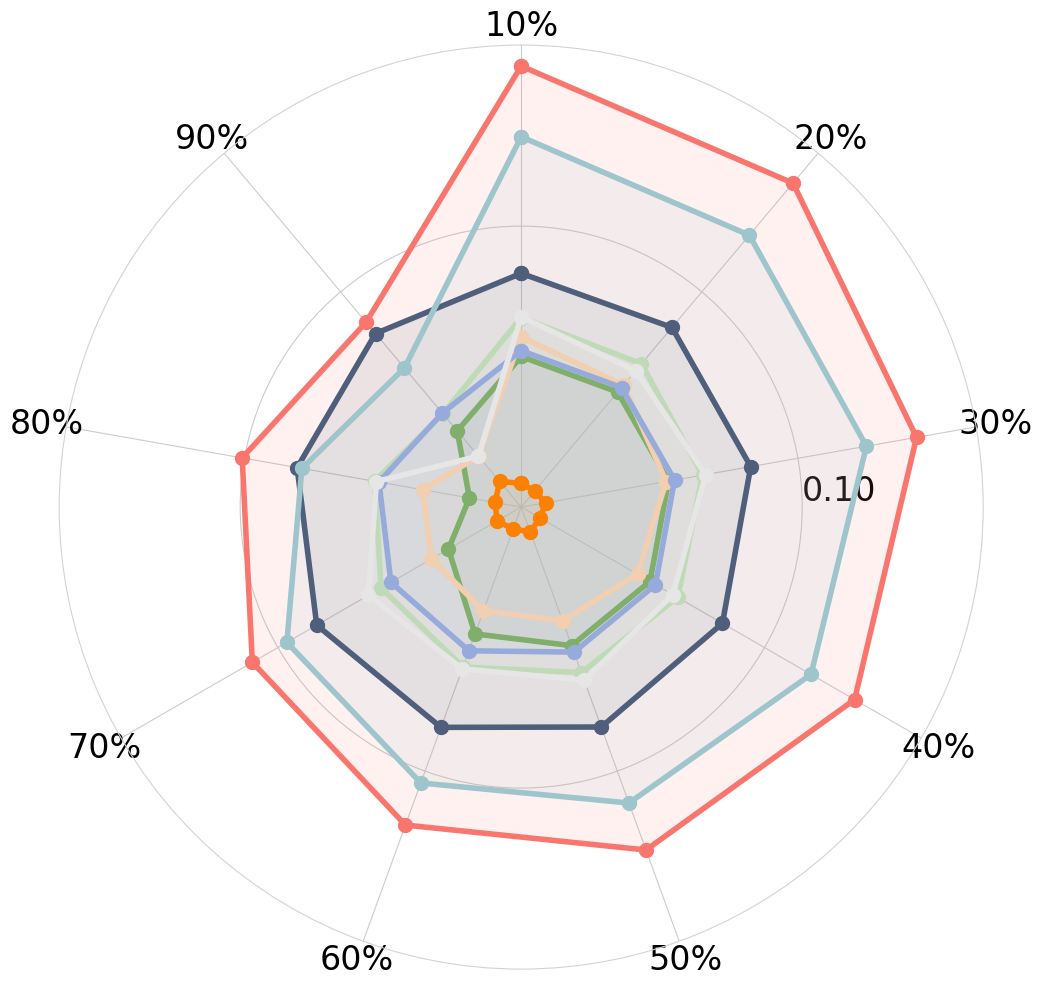

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import requests
sns.set_style("white")

methods = ["STIMP", "DINEOF", "CSDI",  "ImputeFormer", "Inpainter", "Lin-ITP", "MAE", "Slide Window", "TRMF"]
metrics = ["10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%"]
value = np.array([
                  [0.0310, 0.0354, 0.0414, 0.0467, 0.0541, 0.0657, 0.0806, 0.0983,0.1337],
                  [0.6573, 0.6705, 0.6520, 0.6664, 0.6450, 0.6590, 0.6374, 0.6442, 0.6120],
                  [0.2597, 0.2606, 0.2615, 0.2633, 0.2657, 0.2912, 0.4229, 0.5322, 0.3774],
                  [0.1413, 0.1405, 0.1420, 0.1427, 0.1410, 0.1406, 0.1389, 0.1479, 0.1489],
                  [0.2253, 0.2438, 0.2662, 0.2925, 0.3223, 0.3489, 0.3661, 0.3758, 0.4813],
                  [0.1953, 0.1988, 0.2032, 0.2084, 0.2155, 0.2250, 0.2393, 0.2630, 0.3207],
                  [0.0520, 0.0582, 0.0601, 0.0675, 0.0780, 0.0912, 0.1079, 0.1532, 0.2069],
                  [0.2488, 0.2495, 0.2501, 0.2513, 0.2527, 0.2553, 0.2600, 0.2717, 0.3186],
                  [0.1943, 0.2126, 0.1985, 0.2170, 0.2030, 0.2218, 0.2151, 0.2666, 0.4806]])
print(value)

# Function
def plot_radar_chart(data, methods, title, metrics):
    N = len(metrics)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    theta = np.concatenate([theta, [theta[0]]])
    
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "polar"})
    
    ax.set_title(title, y=1.15, fontsize=20)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    
    ax.spines["polar"].set_zorder(1)
    ax.spines["polar"].set_color("lightgrey")
    
    color_palette = ["#F8766D", "#FC8002","#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC","#E7E6E6"]

    

    for i in range(data.shape[0]):
        values = data[i]
        values = np.concatenate([values, values[0][np.newaxis]], 0)
        ax.plot(theta, values, linewidth=4, linestyle="solid", label=methods[i], marker='o', markersize=10,color=color_palette[i%len(color_palette)])
        ax.fill(theta, values, alpha=0.10, color=color_palette[i % len(color_palette)])
        
    
    plt.yticks([0.5, 0.2, 0], color="black", size=24)
    plt.xticks(theta[:-1], metrics, color="black", size=24)
    # plt.yscale("log")
    ax.set_yscale("log")
    

    ax.yaxis.set_inverted(True)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    
    return fig
  

# Plot 
fig = plot_radar_chart(value, methods, title="", metrics=metrics)
plt.show()

[[0.0029 0.0038 0.0051 0.0068 0.0091 0.0127 0.0174 0.0233 0.0376]
 [0.5763 0.6068 0.565  0.598  0.5496 0.5814 0.5328 0.5476 0.4803]
 [0.1134 0.1146 0.1159 0.1186 0.1206 0.1508 0.2778 0.4456 0.2838]
 [0.0407 0.0409 0.0414 0.0417 0.0405 0.0406 0.0399 0.0466 0.0473]
 [0.079  0.0919 0.1081 0.1285 0.1542 0.1797 0.1978 0.2084 0.3269]
 [0.0798 0.0826 0.086  0.09   0.0956 0.103  0.1142 0.1333 0.1843]
 [0.0076 0.0085 0.0104 0.0131 0.017  0.0222 0.0291 0.0352 0.0753]
 [0.0979 0.0986 0.0993 0.1004 0.1019 0.1044 0.1091 0.121  0.1704]
 [0.0696 0.0805 0.0727 0.0833 0.0763 0.0876 0.0863 0.1297 0.3879]]


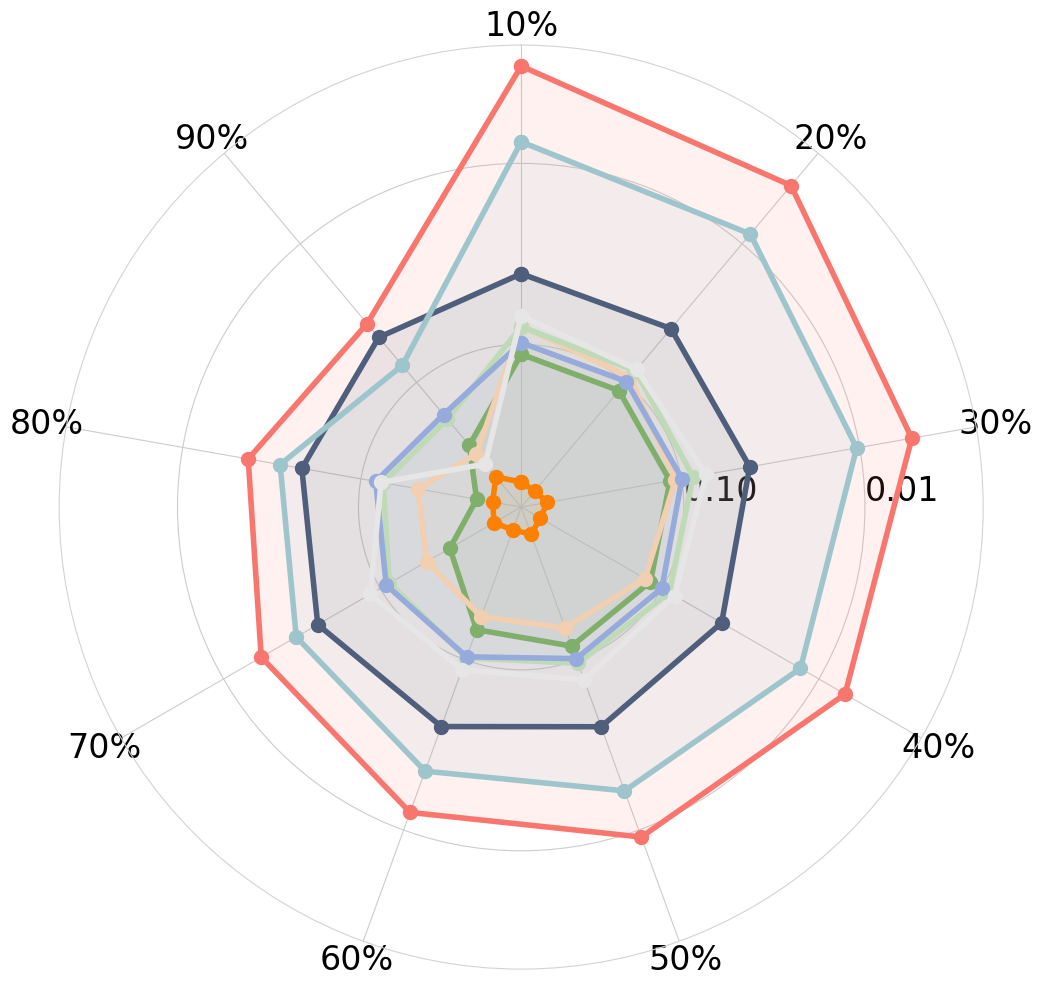

In [3]:
#MSE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import requests
sns.set_style("white")

methods = ["Our", "DINEOF", "CSDI",  "ImputeFormer", "Inpainter", "Lin-ITP", "MAE", "Slide Window", "TRMF"]
metrics = ["10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%"]
value = np.array([
                  [0.0029, 0.0038, 0.0051, 0.0068, 0.0091, 0.0127, 0.0174, 0.0233, 0.0376],
                  [0.5763, 0.6068, 0.5650, 0.5980, 0.5496, 0.5814, 0.5328, 0.5476, 0.4803],
                  [0.1134, 0.1146, 0.1159, 0.1186, 0.1206, 0.1508, 0.2778, 0.4456, 0.2838],
                  [0.0407, 0.0409, 0.0414, 0.0417, 0.0405, 0.0406, 0.0399, 0.0466, 0.0473],
                  [0.0790, 0.0919, 0.1081, 0.1285, 0.1542, 0.1797, 0.1978, 0.2084, 0.3269],
                  [0.0798, 0.0826, 0.0860, 0.0900, 0.0956, 0.1030, 0.1142, 0.1333, 0.1843],
                  [0.0076, 0.0085, 0.0104, 0.0131, 0.0170, 0.0222, 0.0291, 0.0352, 0.0753],
                  [0.0979, 0.0986, 0.0993, 0.1004, 0.1019, 0.1044, 0.1091, 0.1210, 0.1704],
                  [0.0696, 0.0805, 0.0727, 0.0833, 0.0763, 0.0876, 0.0863, 0.1297, 0.3879]])
print(value)


# Function
def plot_radar_chart(data, methods, title, metrics):
    N = len(metrics)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    theta = np.concatenate([theta, [theta[0]]])
    
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "polar"})
    
    ax.set_title(title, y=1.15, fontsize=20)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    
    ax.spines["polar"].set_zorder(1)
    ax.spines["polar"].set_color("lightgrey")
    
    color_palette = ["#F8766D", "#FC8002","#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC","#E7E6E6"]
    # color_palette = sns.color_palette()[:8]
    

    for i in range(data.shape[0]):
        values = data[i]
        values = np.concatenate([values, values[0][np.newaxis]], 0)
        ax.plot(theta, values, linewidth=4, linestyle="solid", label=methods[i], marker='o', markersize=10,color=color_palette[i%len(color_palette)])
        ax.fill(theta, values, alpha=0.10, color=color_palette[i % len(color_palette)])
        
    plt.yticks([0.6, 0.02, 0], color="black", size=24)
    plt.xticks(theta[:-1], metrics, color="black", size=24)
    # plt.yscale("log")
    ax.set_yscale("log")

    ax.yaxis.set_inverted(True)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    # plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1)) 
    # plt.legend(loc="upper right", bbox_to_anchor=(1.05,1.05))
    
    return fig
  

# Plot 
fig = plot_radar_chart(value, methods, title="", metrics=metrics)
plt.show()

MEXICO

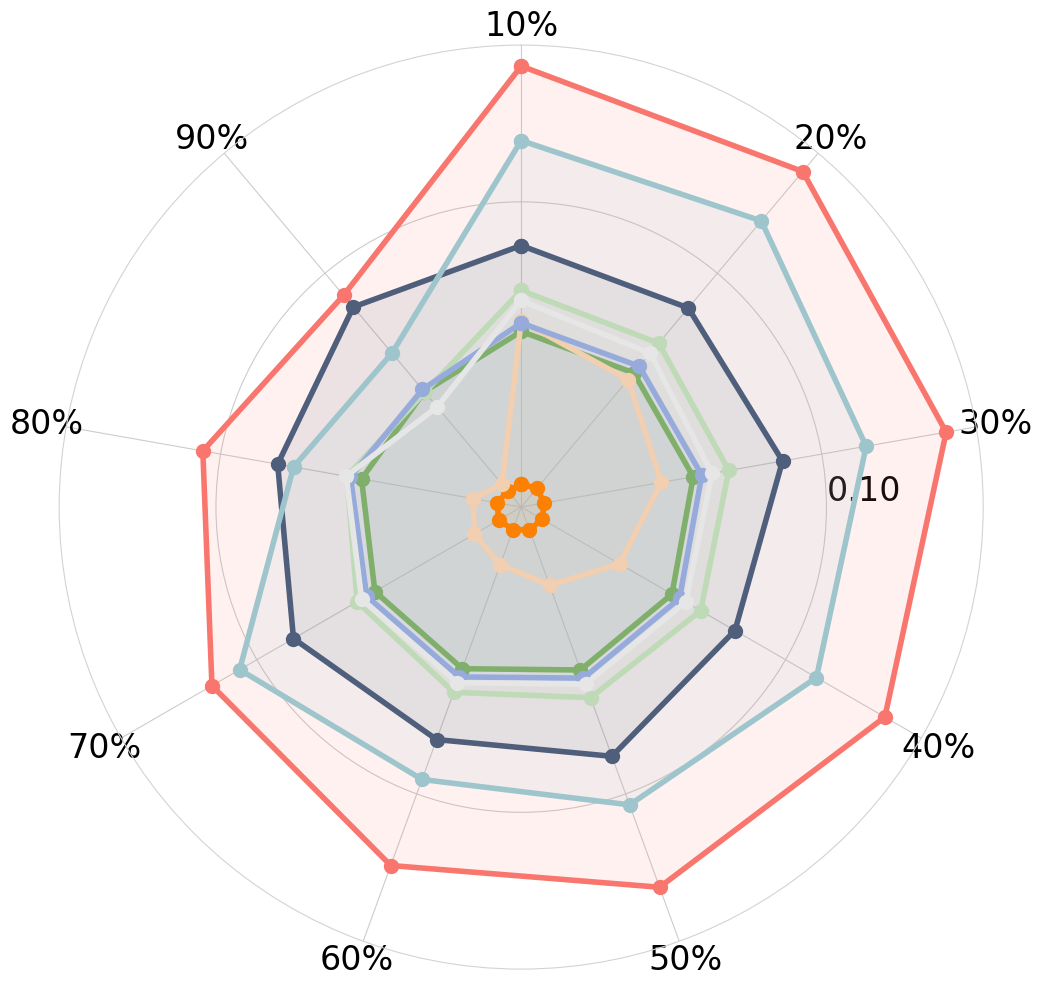

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import matplotlib.ticker as mtick

methods = ["STImp", "DINEOF", "CSDI",  "ImputeFormer", "Inpainter", "Lin-ITP", "MAE", "Slide Window", "TRMF"]
metrics = ["10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%"]
value = np.array([
                  [0.0434, 0.0442, 0.0460, 0.0494, 0.0543, 0.0626, 0.0727, 0.0895, 0.1194],
                  [0.5675, 0.5612, 0.5664, 0.5624, 0.5630, 0.5640, 0.5566, 0.5623, 0.5741],
                  [0.2218, 0.2225, 0.2231, 0.2240, 0.2250, 0.2269, 0.2312, 0.2411, 0.2587],
                  [0.1308, 0.1321, 0.1278, 0.1432, 0.1279, 0.1427, 0.1297, 0.1428, 0.1311],
                  [0.2083, 0.2348, 0.2721, 0.3250, 0.3914, 0.4478, 0.4685, 0.4833, 0.5429],
                  [0.1724, 0.1753, 0.1787, 0.1827, 0.1877, 0.1944, 0.2039, 0.2199, 0.2598],
                  [0.0686, 0.0657, 0.0758, 0.0803, 0.0931, 0.1099, 0.0885, 0.1577, 0.1898],
                  [0.2106, 0.2110, 0.2115, 0.2123, 0.2133, 0.2150, 0.2181, 0.2250, 0.2541],
                  [0.1834, 0.1901, 0.1984, 0.2032, 0.2051, 0.2070, 0.2105, 0.2191, 0.2924]])



# Function
def plot_radar_chart(data, methods, title, metrics):
    N = len(metrics)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    theta = np.concatenate([theta, [theta[0]]])
    
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "polar"})
    
    ax.set_title(title, y=1.15, fontsize=20)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    
    ax.spines["polar"].set_zorder(1)
    ax.spines["polar"].set_color("lightgrey")
    
    color_palette = ["#F8766D", "#FC8002","#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC","#E7E6E6"]

    for i in range(data.shape[0]):
        values = data[i]
        values = np.concatenate([values, values[0][np.newaxis]], 0)
        ax.plot(theta, values, linewidth=4, linestyle="solid", label=methods[i], marker='o', markersize=10,color=color_palette[i%len(color_palette)])
        ax.fill(theta, values, alpha=0.10, color=color_palette[i % len(color_palette)])
        
    
    plt.yticks(np.linspace(0.3, 0, 3), np.linspace(0.3, 0, 3).tolist(), color="black", size=24)
    plt.xticks(theta[:-1], metrics, color="black", size=24)
    ax.set_yscale("log")
    ax.yaxis.set_inverted(True)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    # plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1)) 
    # plt.legend(loc="upper right", bbox_to_anchor=(1.05,1.05))
    
    return fig

# Plot 
fig = plot_radar_chart(value, methods, title="", metrics=metrics)
plt.show()

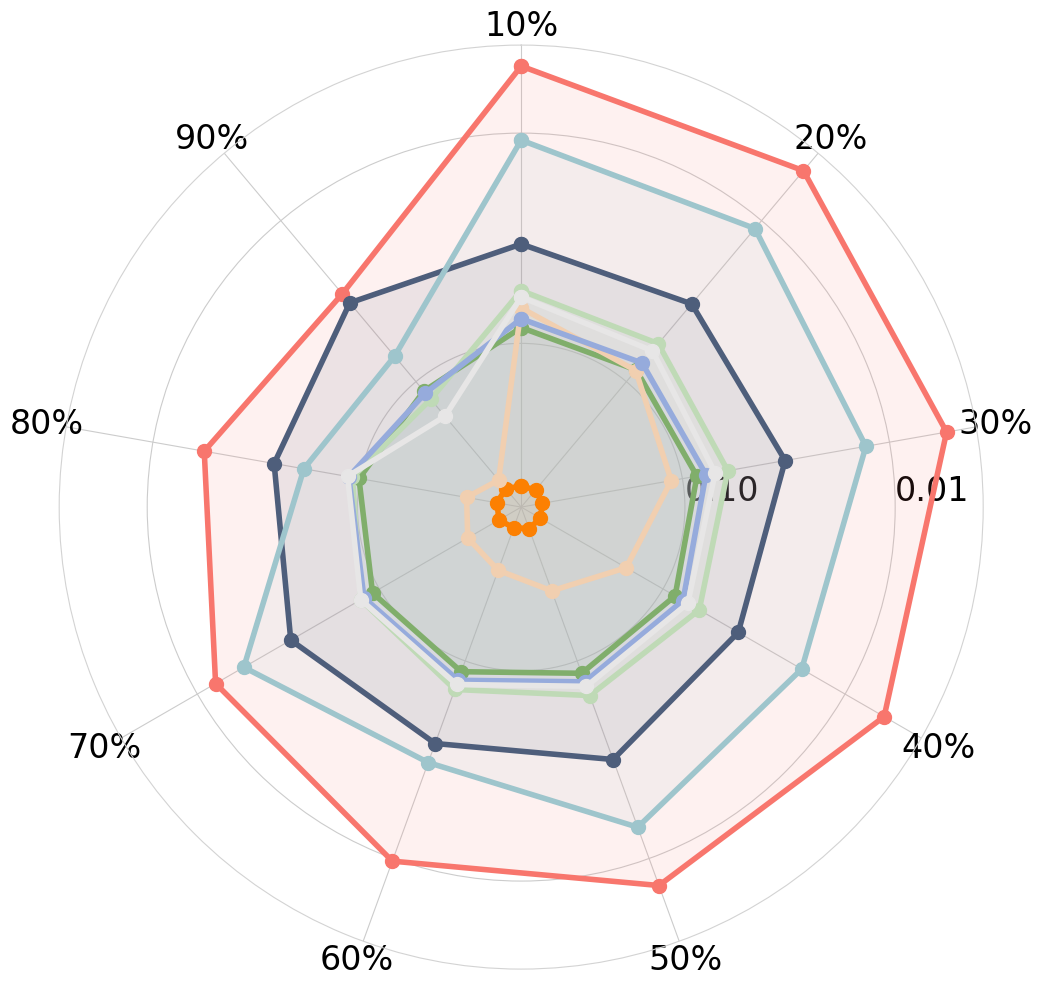

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import matplotlib.ticker as mtick

methods = ["STImp", "DINEOF", "CSDI",  "ImputeFormer", "Inpainter", "Lin-ITP", "MAE", "Slide Window", "TRMF"]
metrics = ["10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%"]
value = np.array([
                  [0.0048, 0.0049, 0.0053, 0.0061, 0.0073, 0.0097, 0.0126, 0.0177, 0.0285],
                  [0.4773, 0.4696, 0.4749, 0.4710, 0.4680, 0.4723, 0.4533, 0.4590, 0.4611],
                  [0.0841, 0.0846, 0.0851, 0.0858, 0.0866, 0.0882, 0.0917, 0.0989, 0.1144],
                  [0.0337, 0.0329, 0.0319, 0.0386, 0.0317, 0.0382, 0.0326, 0.0385, 0.0324],
                  [0.0679, 0.0853, 0.1132, 0.1593, 0.2263, 0.2875, 0.3055, 0.3274, 0.4087],
                  [0.0561, 0.0581, 0.0604, 0.0632, 0.0668, 0.0717, 0.0790, 0.0920, 0.1286],
                  [0.0108, 0.0112, 0.0130, 0.0173, 0.0144, 0.0306, 0.0180, 0.0536, 0.0695],
                  [0.0764, 0.0766, 0.0770, 0.0776, 0.0784, 0.0798, 0.0823, 0.0883, 0.1175],
                  [0.0602, 0.0643, 0.0695, 0.0730, 0.0744, 0.0760, 0.0790, 0.0871, 0.1640]])


# Function
def plot_radar_chart(data, methods, title, metrics):
    N = len(metrics)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    theta = np.concatenate([theta, [theta[0]]])
    
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "polar"})
    
    ax.set_title(title, y=1.15, fontsize=20)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    
    ax.spines["polar"].set_zorder(1)
    ax.spines["polar"].set_color("lightgrey")
    
    color_palette = ["#F8766D", "#FC8002","#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC","#E7E6E6"]

    for i in range(data.shape[0]):
        values = data[i]
        values = np.concatenate([values, values[0][np.newaxis]], 0)
        ax.plot(theta, values, linewidth=4, linestyle="solid", label=methods[i], marker='o', markersize=10,color=color_palette[i%len(color_palette)])
        ax.fill(theta, values, alpha=0.10, color=color_palette[i % len(color_palette)])
        
    
    plt.yticks(np.linspace(0.3, 0, 3), np.linspace(0.3, 0, 3).tolist(), color="black", size=24)
    plt.xticks(theta[:-1], metrics, color="black", size=24)
    ax.set_yscale("log")
    ax.yaxis.set_inverted(True)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    # plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1)) 
    # plt.legend(loc="upper right", bbox_to_anchor=(1.05,1.05))
    
    return fig

# Plot 
fig = plot_radar_chart(value, methods, title="", metrics=metrics)
plt.show()

Chesapeake

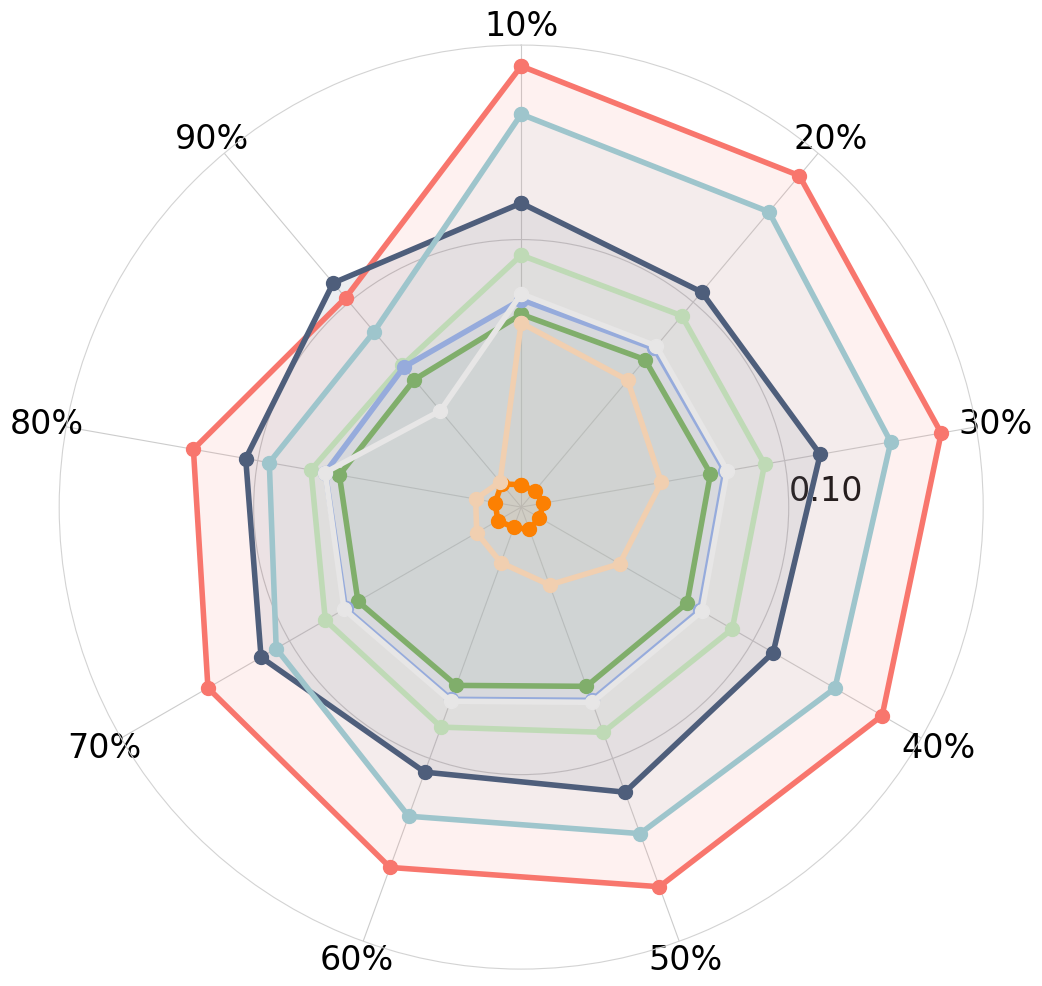

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import matplotlib.ticker as mtick

metrics = ["10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%"]
value = np.array([
                  [0.0316, 0.0334, 0.0348, 0.0371, 0.0404, 0.0463, 0.0535, 0.0648, 0.0963],
                  [0.5095, 0.5140, 0.5084, 0.5138, 0.5045, 0.5117, 0.4939, 0.4958, 0.4832],
                  [0.1643, 0.1645, 0.1649, 0.1655, 0.1665, 0.1676, 0.1690, 0.1734, 0.1958],
                  [0.0785, 0.0916, 0.0787, 0.0856, 0.0788, 0.0908, 0.0804, 0.0922, 0.0847],
                  [0.1740, 0.1967, 0.2297, 0.2779, 0.3410, 0.3988, 0.4201, 0.4347, 0.4749],
                  [0.1109, 0.1125, 0.1145, 0.1171, 0.1203, 0.1248, 0.1316, 0.1432, 0.1730],
                  [0.0435, 0.0457, 0.0489, 0.0533, 0.0588, 0.0665, 0.0903, 0.1081, 0.1292],
                  [0.1490, 0.1494, 0.1497, 0.1502, 0.1508, 0.1519, 0.1537, 0.1577, 0.1757],
                  [0.1434, 0.1463, 0.1473, 0.1479, 0.1487, 0.1499, 0.1519, 0.1576, 0.2564]])


# Function
def plot_radar_chart(data, methods, title, metrics):
    N = len(metrics)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    theta = np.concatenate([theta, [theta[0]]])
    
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "polar"})
    
    ax.set_title(title, y=1.15, fontsize=20)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    
    ax.spines["polar"].set_zorder(1)
    ax.spines["polar"].set_color("lightgrey")
    
    color_palette = ["#F8766D", "#FC8002","#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC","#E7E6E6"]

    for i in range(data.shape[0]):
        values = data[i]
        values = np.concatenate([values, values[0][np.newaxis]], 0)
        ax.plot(theta, values, linewidth=4, linestyle="solid", label=methods[i], marker='o', markersize=10,color=color_palette[i%len(color_palette)])
        ax.fill(theta, values, alpha=0.10, color=color_palette[i % len(color_palette)])
        
    
    plt.yticks(np.linspace(0.5, 0, 5), np.linspace(0.5, 0, 5).tolist(), color="black", size=24)
    plt.xticks(theta[:-1], metrics, color="black", size=24)
    ax.set_yscale("log")
    ax.yaxis.set_inverted(True)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    # plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1)) 
    # plt.legend(loc="upper right", bbox_to_anchor=(1.05,1.05))
    
    return fig

# Plot 
fig = plot_radar_chart(value, methods, title="", metrics=metrics)
plt.show()

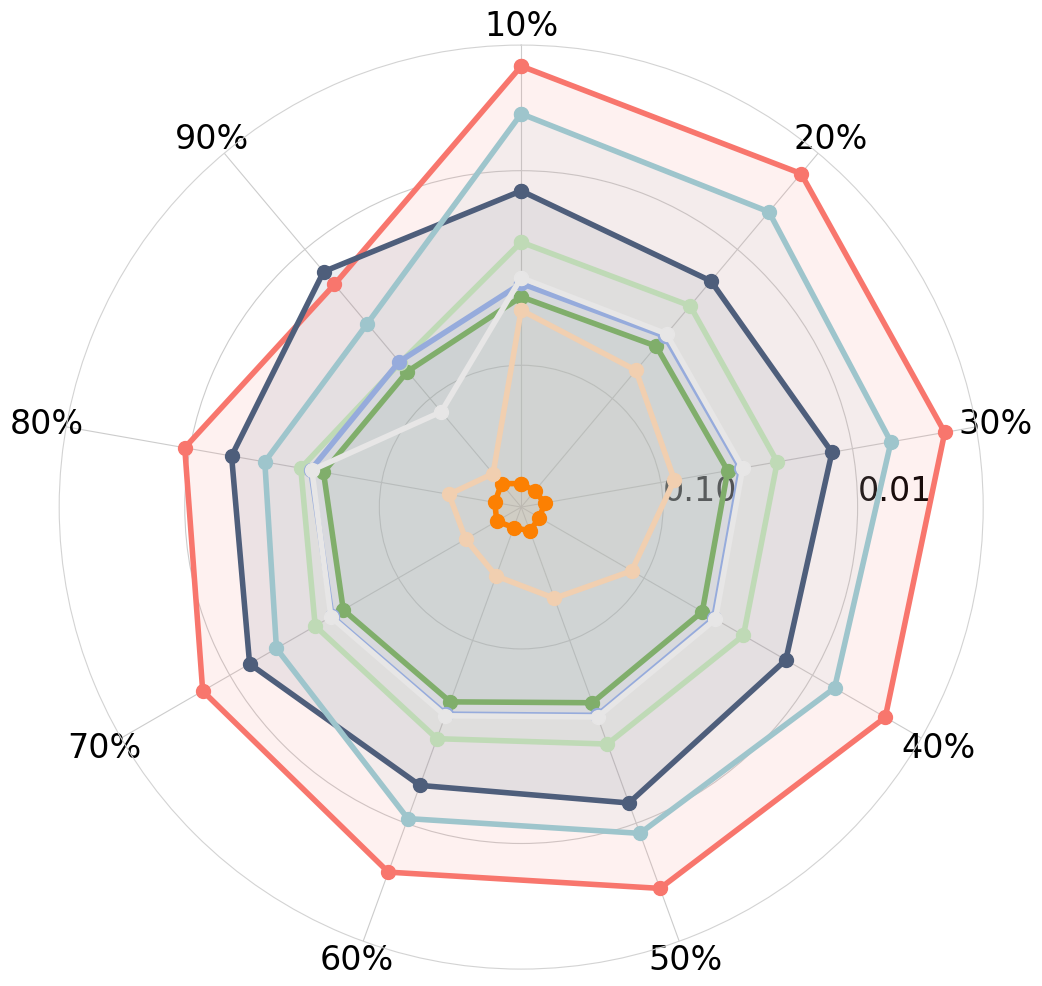

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import matplotlib.ticker as mtick

metrics = ["10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%"]
value = np.array([
                  [0.0029, 0.0031, 0.0033, 0.0037, 0.0044, 0.0054, 0.0069, 0.0094, 0.0172],
                  [0.4057, 0.4180, 0.4036, 0.4176, 0.3974, 0.4142, 0.3835, 0.3903, 0.3731],
                  [0.0445, 0.0446, 0.0448, 0.0451, 0.0456, 0.0461, 0.0471, 0.0498, 0.0660],
                  [0.0127, 0.0163, 0.0128, 0.0144, 0.0129, 0.0161, 0.0131, 0.0165, 0.0141],
                  [0.0521, 0.0648, 0.0850, 0.1184, 0.1698, 0.2251, 0.2508, 0.2251, 0.3194],
                  [0.0233, 0.0239, 0.0247, 0.0257, 0.0271, 0.0290, 0.0321, 0.0379, 0.0577],
                  [0.0051, 0.0056, 0.0063, 0.0074, 0.0088, 0.0106, 0.0189, 0.0246, 0.0315],
                  [0.0380, 0.0382, 0.0384, 0.0386, 0.0389, 0.0395, 0.0404, 0.0427, 0.0567],
                  [0.0355, 0.0369, 0.0374, 0.0377, 0.0381, 0.0387, 0.0398, 0.0433, 0.1230]])


# Function
def plot_radar_chart(data, methods, title, metrics):
    N = len(metrics)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    theta = np.concatenate([theta, [theta[0]]])
    
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "polar"})
    
    ax.set_title(title, y=1.15, fontsize=20)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    
    ax.spines["polar"].set_zorder(1)
    ax.spines["polar"].set_color("lightgrey")
    
    color_palette = ["#F8766D", "#FC8002","#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC","#E7E6E6"]

    for i in range(data.shape[0]):
        values = data[i]
        values = np.concatenate([values, values[0][np.newaxis]], 0)
        ax.plot(theta, values, linewidth=4, linestyle="solid", label=methods[i], marker='o', markersize=10,color=color_palette[i%len(color_palette)])
        ax.fill(theta, values, alpha=0.10, color=color_palette[i % len(color_palette)])
        
    
    plt.yticks(np.linspace(0.5, 0, 5), np.linspace(0.5, 0, 5).tolist(), color="black", size=24)
    plt.xticks(theta[:-1], metrics, color="black", size=24)
    ax.set_yscale("log")
    ax.yaxis.set_inverted(True)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    # plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1)) 
    # plt.legend(loc="upper right", bbox_to_anchor=(1.05,1.05))
    
    return fig

# Plot 
fig = plot_radar_chart(value, methods, title="", metrics=metrics)
plt.show()

Yangtze

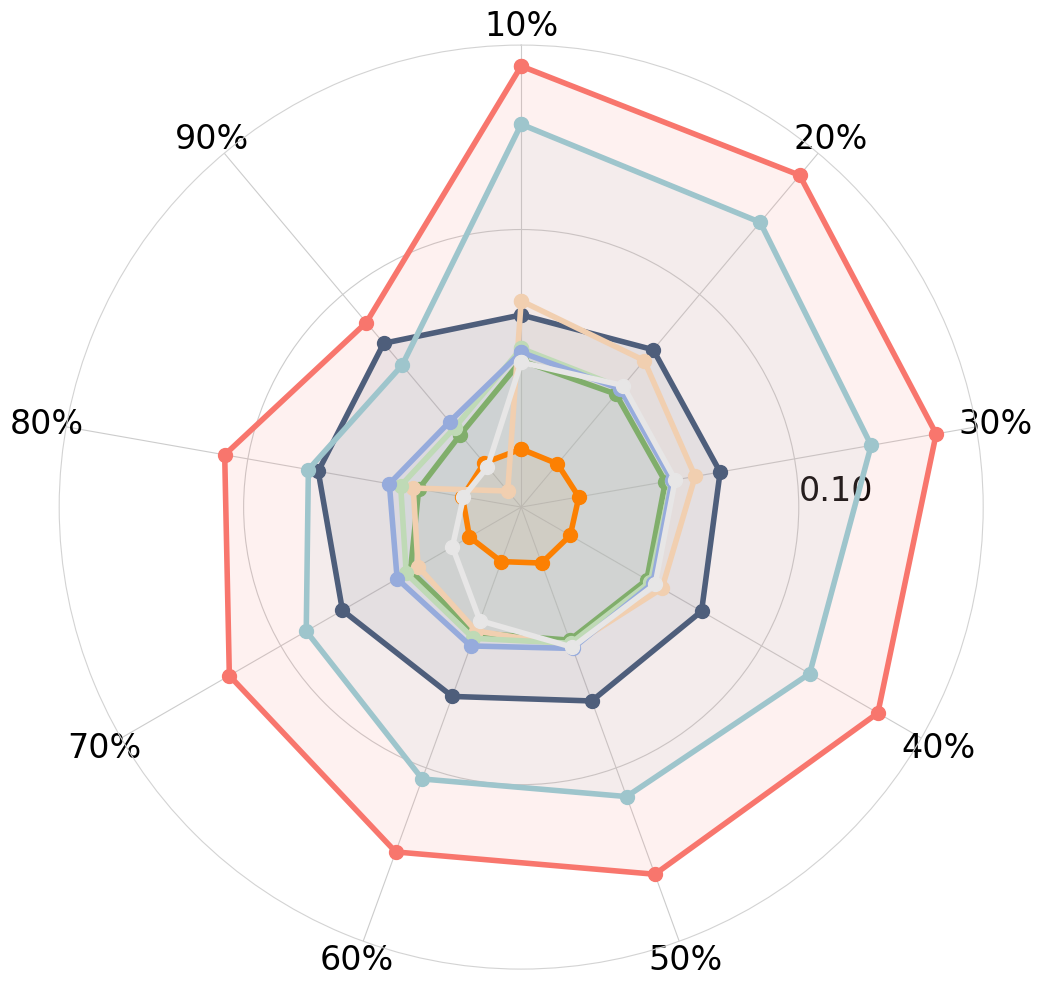

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import matplotlib.ticker as mtick

value = np.array([
                  [0.0359, 0.0377, 0.0406, 0.0431, 0.0492, 0.0571, 0.0689, 0.0863, 0.1258],
                  [0.3958, 0.3999, 0.3947, 0.3994, 0.3922, 0.3960, 0.3917, 0.3920, 0.3970],
                  [0.2274, 0.2260, 0.2276, 0.2294, 0.2345, 0.2461, 0.2556, 0.2967, 0.3148],
                  [0.1708, 0.1572, 0.1606, 0.1544, 0.1563, 0.1611, 0.1562, 0.1565, 0.1491],
                  [0.1564, 0.1717, 0.1883, 0.2056, 0.2258, 0.2493, 0.2701, 0.2865, 0.4994],
                  [0.2108, 0.2145, 0.2187, 0.2236, 0.2297, 0.2373, 0.2479, 0.2645, 0.2975],
                  [0.0517, 0.0554, 0.0614, 0.0706, 0.0826, 0.0929, 0.1202, 0.1470, 0.1784],
                  [0.2159, 0.2168, 0.2180, 0.2196, 0.2219, 0.2256, 0.2321, 0.2461, 0.2834],
                  [0.2299, 0.2107, 0.2137, 0.2161, 0.2237, 0.2672, 0.3463, 0.3945, 0.4101]])


# Function[]
def plot_radar_chart(data, methods, title, metrics):
    N = len(metrics)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    theta = np.concatenate([theta, [theta[0]]])
    
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "polar"})
    
    ax.set_title(title, y=1.15, fontsize=20)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    
    ax.spines["polar"].set_zorder(1)
    ax.spines["polar"].set_color("lightgrey")
    
    color_palette = ["#F8766D", "#FC8002","#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC","#E7E6E6"]

    for i in range(data.shape[0]):
        values = data[i]
        values = np.concatenate([values, values[0][np.newaxis]], 0)
        ax.plot(theta, values, linewidth=4, linestyle="solid", label=methods[i], marker='o', markersize=10,color=color_palette[i%len(color_palette)])
        ax.fill(theta, values, alpha=0.10, color=color_palette[i % len(color_palette)])
        
    
    plt.yticks(np.linspace(0.3, 0, 5), np.linspace(0.3, 0, 5).tolist(), color="black", size=24)
    plt.xticks(theta[:-1], metrics, color="black", size=24)

    ax.set_yscale("log")
    ax.yaxis.set_inverted(True)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    # plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1)) 
    # plt.legend(loc="upper right", bbox_to_anchor=(1.05,1.05))
    
    return fig

# Plot 
fig = plot_radar_chart(value, methods, title="", metrics=metrics)
plt.show()

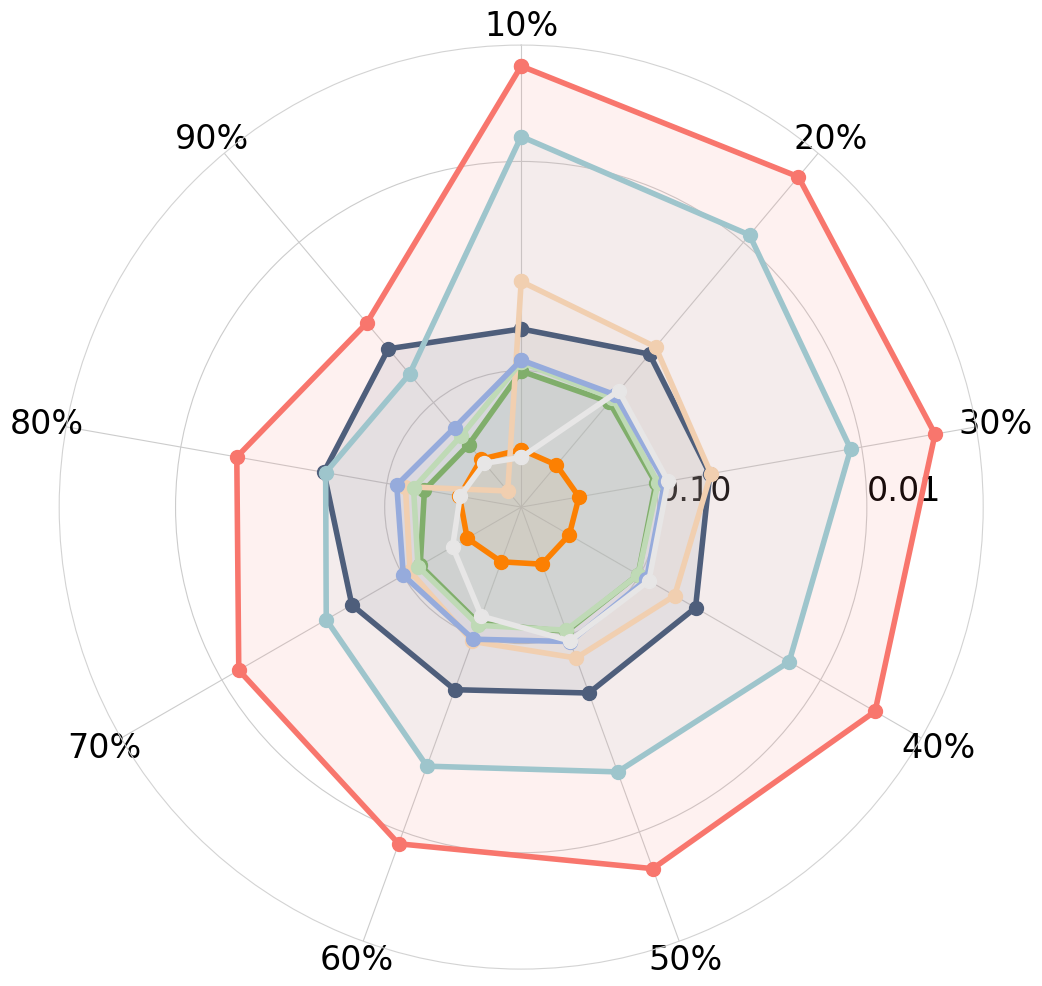

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import matplotlib.ticker as mtick

value = np.array([
                  [0.0035, 0.0039, 0.0044, 0.0050, 0.0065, 0.0087, 0.0124, 0.0187, 0.0319],
                  [0.2385, 0.2456, 0.2355, 0.2439, 0.2303, 0.2367, 0.2262, 0.2255, 0.2260],
                  [0.1006, 0.0993, 0.0997, 0.1016, 0.1047, 0.1153, 0.1245, 0.1524, 0.1830],
                  [0.0632, 0.0499, 0.0546, 0.0490, 0.0509, 0.0529, 0.0522, 0.0495, 0.0462],
                  [0.0375, 0.0450, 0.0539, 0.0639, 0.0767, 0.0932, 0.1094, 0.1232, 0.3567],
                  [0.0912, 0.0941, 0.0974, 0.1014, 0.1063, 0.1125, 0.1211, 0.1349, 0.1610],
                  [0.0076, 0.0090, 0.0113, 0.0149, 0.0202, 0.0216, 0.0377, 0.0505, 0.0664],
                  [0.0890, 0.0896, 0.0903, 0.0914, 0.0930, 0.0956, 0.1004, 0.1118, 0.1435],
                  [0.2603, 0.0846, 0.0870, 0.0887, 0.0937, 0.1252, 0.1879, 0.2271, 0.2397]])


# Function[]
def plot_radar_chart(data, methods, title, metrics):
    N = len(metrics)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    theta = np.concatenate([theta, [theta[0]]])
    
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "polar"})
    
    ax.set_title(title, y=1.15, fontsize=20)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    
    ax.spines["polar"].set_zorder(1)
    ax.spines["polar"].set_color("lightgrey")
    
    color_palette = ["#F8766D", "#FC8002","#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC","#E7E6E6"]

    for i in range(data.shape[0]):
        values = data[i]
        values = np.concatenate([values, values[0][np.newaxis]], 0)
        ax.plot(theta, values, linewidth=4, linestyle="solid", label=methods[i], marker='o', markersize=10,color=color_palette[i%len(color_palette)])
        ax.fill(theta, values, alpha=0.10, color=color_palette[i % len(color_palette)])
        
    
    plt.yticks(np.linspace(0.3, 0, 5), np.linspace(0.3, 0, 5).tolist(), color="black", size=24)
    plt.xticks(theta[:-1], metrics, color="black", size=24)
    ax.set_yscale("log")
    ax.yaxis.set_inverted(True)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    # plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1)) 
    # plt.legend(loc="upper right", bbox_to_anchor=(1.05,1.05))
    
    return fig

# Plot 
fig = plot_radar_chart(value, methods, title="", metrics=metrics)
plt.show()